In [1]:
import random as random

import pandas as pd

from sklearn import preprocessing

from src.constants import CATEGORICAL_CONFOUNDERS, CONTINUOUS_COVARIATES_PROCESSED, STATIC_COLS, TARGET_COL

In [2]:
fpath_base_data = "/home/gaurang/glycemic_control/data/glycaemia_project_csvs/processed_data/20220907_002221_base_dataset.csv"

In [3]:
df_base_data = pd.read_csv(fpath_base_data)
df_base_data

,subject_id,stay_id,hr,glucose,sofa_24hours,liver_24hours,weight_kg,height_cm,bmi,cns_24hours,...,malignant_cancer,aids,diabetes,diabetes_type,septic,gender,ethnicity,tube_feeding,dextrose,insulin
0,12207593,30000646,0.0,102.0,0.0,0.0,76.248815,170.18,26.3,0.0,...,1,0,0,0,0,M,ASIAN,0.0,0.000000,0.000000
1,12207593,30000646,4.0,108.0,1.0,0.0,76.248815,170.18,26.3,0.0,...,1,0,0,0,0,M,ASIAN,0.0,2.500000,0.000000
2,12207593,30000646,17.0,144.0,3.0,0.0,76.248815,170.18,26.3,0.0,...,1,0,0,0,0,M,ASIAN,0.0,2.500000,0.000000
3,12207593,30000646,27.0,86.0,3.0,0.0,76.248815,170.18,26.3,0.0,...,1,0,0,0,0,M,ASIAN,0.0,0.000000,0.000000
4,12207593,30000646,55.0,119.0,1.0,0.0,76.248815,170.18,26.3,0.0,...,1,0,0,0,0,M,ASIAN,0.0,2.916667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211899,11256534,39999552,13.0,86.0,8.0,0.0,64.500000,172.72,21.6,4.0,...,0,0,0,0,0,F,WHITE,0.0,0.918011,1.305320
211900,11256534,39999552,14.0,91.0,8.0,0.0,64.500000,172.72,21.6,4.0,...,0,0,0,0,0,F,WHITE,0.0,0.969222,1.138684
211901,11256534,39999552,16.0,134.0,8.0,0.0,64.500000,172.72,21.6,4.0,...,0,0,0,0,0,F,WHITE,0.0,0.713331,0.499910
211902,11256534,39999552,17.0,92.0,8.0,0.0,64.500000,172.72,21.6,4.0,...,0,0,0,0,0,F,WHITE,0.0,0.747886,0.422146


In [4]:
subject_ids = list(df_base_data.subject_id.unique())

In [5]:
df_patient_group = df_base_data.groupby(by='subject_id')

In [6]:
sample_df = df_patient_group.get_group(random.choice(subject_ids)).drop(labels=CATEGORICAL_CONFOUNDERS, axis=1)

In [7]:
sample_df

,subject_id,stay_id,hr,glucose,sofa_24hours,liver_24hours,weight_kg,height_cm,bmi,cns_24hours,admission_age,cardiovascular_24hours,charlson_comorbidity_index,coagulation_24hours,respiration_24hours,renal_24hours,admission_age.1,tube_feeding,dextrose,insulin
161028,11482212,37616420,0.0,99.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.000000,0.000000
161029,11482212,37616420,2.0,102.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.000000,0.000000
161030,11482212,37616420,3.0,124.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.006944,0.000000
161031,11482212,37616420,4.0,141.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.090278,0.138889
161032,11482212,37616420,6.0,129.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.256944,1.430706
161033,11482212,37616420,7.0,135.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.340278,1.764096
161034,11482212,37616420,8.0,130.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.416667,2.161420
161035,11482212,37616420,10.0,141.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.416667,2.222818
161036,11482212,37616420,11.0,129.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.833333,2.231245
161037,11482212,37616420,12.0,117.0,4.0,0.0,90.0,175.0,29.4,0.0,76,1.0,4,1.0,2.0,0.0,76,0.0,0.833333,2.398032


### plotting

In [8]:
from src.plotting_scripts import visualize_patient_data

(<Figure size 1080x720 with 2 Axes>,
 {'liver_24hours': 0.0,
  'cns_24hours': 0.0,
  'charlson_comorbidity_index': 4,
  'renal_24hours': 0.0,
  'tube_feeding': 0.0,
  'weight_kg': 90.0,
  'height_cm': 175.0,
  'bmi': 29.4,
  'admission_age': 76})

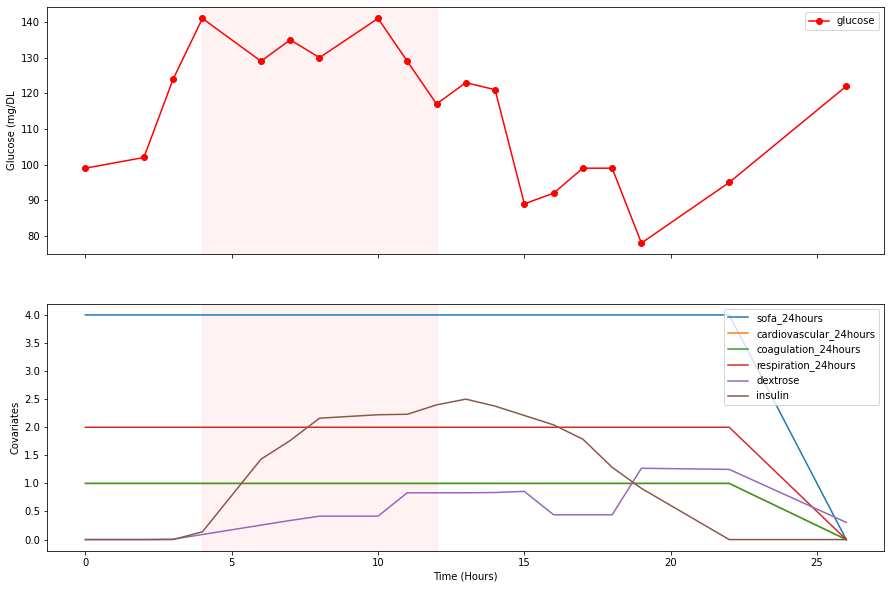

In [9]:
from src.constants import META_COLS


visualize_patient_data(sample_df, CONTINUOUS_COVARIATES_PROCESSED + STATIC_COLS, shade_hyperglycemia=True)